In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, ward
from scipy.spatial.distance import pdist

In [31]:
file_path = '/Users/Annaliese/Desktop/PopGenStats_Project/data/BifidoIsolates/BLongum/skani_ani_edge_list.tsv'

skani_matrix = pd.read_csv(file_path, sep='\t')

sample_names = sorted(set(skani_matrix['Ref_file']) | set(skani_matrix['Query_file']))
mapper = {name: f'sample{idx}' for idx, name in enumerate(sample_names)}

skani_matrix['ref'] = skani_matrix['Ref_file'].map(mapper)
skani_matrix['query'] = skani_matrix['Query_file'].map(mapper)

skani_matrix['score1'] = skani_matrix['ANI'] * (skani_matrix['Align_fraction_ref'] / 100)
skani_matrix['score2'] = skani_matrix['ANI'] * (skani_matrix['Align_fraction_query'] / 100)

skani_matrix

,Ref_file,Query_file,ANI,Align_fraction_ref,Align_fraction_query,Ref_name,Query_name,ref,query,score1,score2
0,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCF_003...,98.47,89.03,76.10,RQBZ01000002.1 MAG: Bifidobacterium longum iso...,NZ_QSBQ01000001.1 Bifidobacterium longum strai...,sample0,sample189,87.667841,74.935670
1,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCF_015...,98.56,88.41,81.08,RQBZ01000002.1 MAG: Bifidobacterium longum iso...,NZ_JADMOM010000010.1 Bifidobacterium longum st...,sample0,sample378,87.136896,79.912448
2,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCF_001...,98.84,89.01,83.32,RQBZ01000002.1 MAG: Bifidobacterium longum iso...,NZ_LKSV01000001.1 Bifidobacterium longum subsp...,sample0,sample110,87.977484,82.353488
3,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCF_004...,98.57,88.19,82.55,RQBZ01000002.1 MAG: Bifidobacterium longum iso...,NZ_SHRT01000001.1 Bifidobacterium longum subsp...,sample0,sample299,86.928883,81.369535
4,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCF_020...,98.87,91.94,75.85,RQBZ01000002.1 MAG: Bifidobacterium longum iso...,NZ_CP084020.1 Bifidobacterium longum subsp. lo...,sample0,sample488,90.901078,74.992895
...,...,...,...,...,...,...,...,...,...,...,...
160456,wdir/blongum/genomes/ncbi_dataset/data/GCF_019...,wdir/blongum/genomes/ncbi_dataset/data/GCF_019...,98.69,81.12,82.38,NZ_JAHOGG010000010.1 Bifidobacterium longum st...,NZ_JAHOMG010000010.1 Bifidobacterium longum st...,sample457,sample469,80.057328,81.300822
160457,wdir/blongum/genomes/ncbi_dataset/data/GCF_019...,wdir/blongum/genomes/ncbi_dataset/data/GCF_029...,98.58,78.18,82.31,NZ_JAHOGG010000010.1 Bifidobacterium longum st...,NZ_JARJNL010000001.1 Bifidobacterium longum st...,sample457,sample530,77.069844,81.141198
160458,wdir/blongum/genomes/ncbi_dataset/data/GCF_019...,wdir/blongum/genomes/ncbi_dataset/data/GCF_019...,99.99,92.63,99.80,NZ_JAHOGG010000010.1 Bifidobacterium longum st...,NZ_JAHOGP010000010.1 Bifidobacterium longum st...,sample457,sample463,92.620737,99.790020
160459,wdir/blongum/genomes/ncbi_dataset/data/GCF_019...,wdir/blongum/genomes/ncbi_dataset/data/GCF_028...,98.24,79.12,86.13,NZ_JAHOGG010000010.1 Bifidobacterium longum st...,NZ_CP116390.1 Bifidobacterium longum strain LB...,sample457,sample524,77.727488,84.614112


In [32]:

diagonal_data = []
for sample in sample_names:
    diagonal_data.append({
        'Ref_file': sample,
        'Query_file': sample,
        'ANI': 100,
        'Align_fraction_ref': 100,
        'Align_fraction_query': 100,
        'Ref_name': '',
        'Query_name': '',
        'ref': mapper[sample],
        'query': mapper[sample],
        'score1': 100,
        'score2': 100
    })

diagonal_df = pd.DataFrame(diagonal_data)
skani_matrix = pd.concat([skani_matrix, diagonal_df], ignore_index=True)

skani_matrix = skani_matrix.sort_values(by=['Ref_file', 'Query_file']).reset_index(drop=True)

skani_matrix[['ref', 'query', 'score1', 'score2']]

,ref,query,score1,score2
0,sample0,sample0,100.000000,100.000000
1,sample0,sample1,97.665040,94.442792
2,sample0,sample2,86.589510,83.075790
3,sample0,sample3,86.715648,84.593168
4,sample0,sample4,86.493750,81.986190
...,...,...,...,...
161023,sample564,sample565,68.171280,64.894920
161024,sample564,sample566,69.682977,73.211229
161025,sample565,sample565,100.000000,100.000000
161026,sample565,sample566,65.974604,72.802556


In [37]:
upper_triangle = skani_matrix.pivot(index='ref', columns='query', values='score1').fillna(0)
upper_triangle = upper_triangle[sorted(upper_triangle.columns)]

lower_triangle = skani_matrix.pivot(index='query', columns='ref', values='score2').fillna(0)
lower_triangle = lower_triangle[sorted(lower_triangle.columns)]

new_skani_matrix = upper_triangle + lower_triangle
new_skani_matrix[:] = np.where(new_skani_matrix==200, 100, new_skani_matrix)
new_skani_matrix

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ref,,,,,,,,,,,,,,,,,,,,,
sample0,100.000000,97.665040,85.638960,75.355006,89.525117,88.508780,87.213910,90.433413,87.994368,90.207458,...,89.163904,88.152492,88.010790,86.293410,89.999988,89.391735,91.197688,77.089803,87.752208,75.150774
sample1,94.442792,100.000000,85.188930,74.535760,88.656386,86.643030,86.108844,88.705248,87.165576,88.983020,...,87.810268,86.883523,86.914360,85.521312,88.963226,88.498018,90.569676,75.582640,86.722038,74.276972
sample10,74.196840,76.331970,100.000000,67.601196,79.045120,79.099136,79.501034,77.884175,79.231593,79.673335,...,76.999482,77.001600,80.962108,79.890985,80.294130,82.139904,82.400836,68.287146,78.216624,67.709562
sample100,66.312018,67.824055,68.648904,100.000000,71.234031,68.810320,70.120464,69.716448,72.354570,72.256766,...,70.153119,70.533556,71.466504,68.437206,71.259536,71.546464,71.603707,76.609854,68.724984,98.020197
sample101,80.081122,82.014828,81.597824,72.411453,100.000000,84.017866,85.706740,84.421696,87.850980,85.930779,...,84.001463,87.121044,86.934960,84.931376,89.616590,86.373966,86.848510,72.040636,82.075821,72.149632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,78.994819,80.866660,83.776000,71.845862,85.334151,81.369535,84.000024,83.326176,85.795750,85.215740,...,82.352937,81.542840,86.161680,86.168664,85.480389,100.000000,90.098298,71.641885,81.877881,71.813890
sample96,77.079052,79.152000,80.376680,68.778894,82.053800,79.593301,79.443816,80.299704,83.457888,83.827590,...,79.750362,78.868242,82.659330,83.109741,84.082075,86.177106,100.000000,67.911844,76.962120,68.647050
sample97,64.978872,65.882350,66.437884,73.389550,67.882768,66.902625,67.635372,67.148952,70.271806,68.842044,...,69.915107,67.762125,67.326792,68.168927,68.741286,68.333844,67.737388,100.000000,66.401344,73.045260


In [38]:
assert list(lower_triangle.columns) == list(upper_triangle.columns)
assert list(lower_triangle.index) == list(upper_triangle.index)

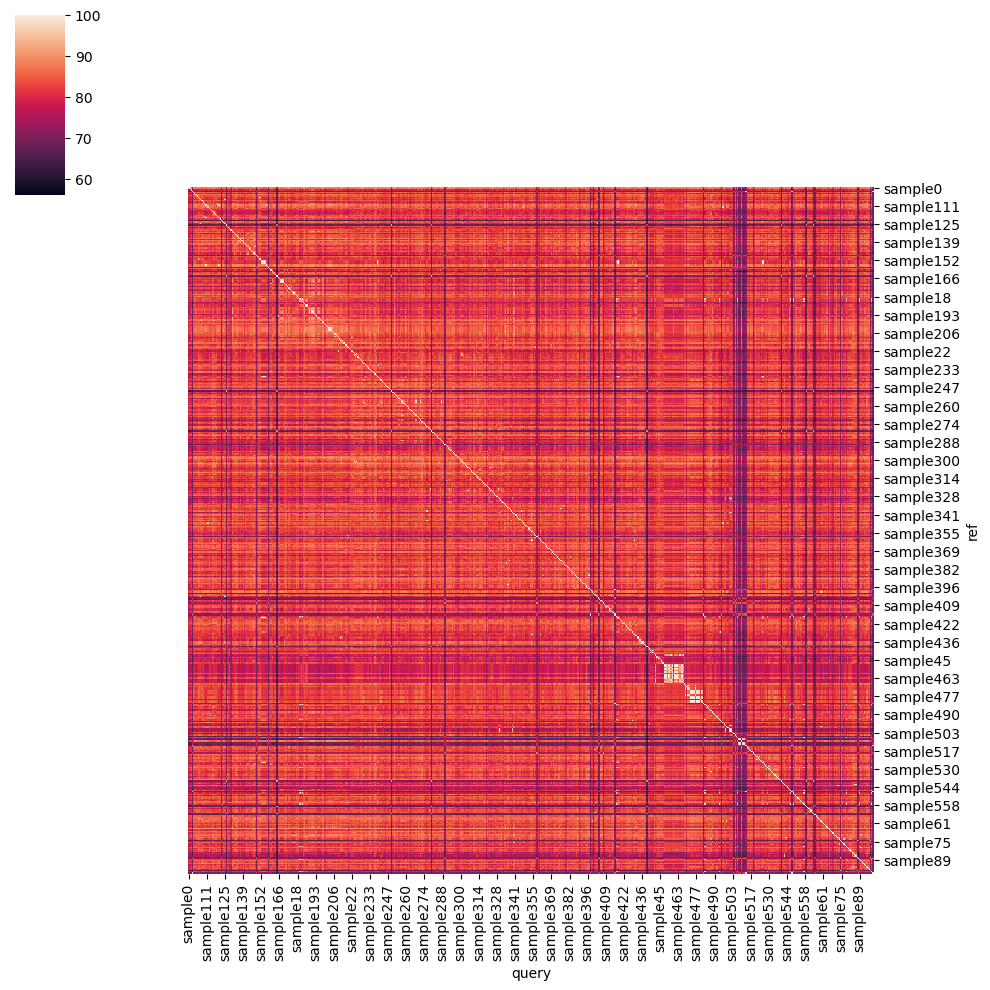

In [39]:

sns.clustermap(new_skani_matrix, row_cluster=False, col_cluster=False)